In [1]:
import numpy as np
import matplotlib.pyplot as plt
from phi.tf.flow import *

In [116]:
import numpy as np
from phi.flow import *

# N is the number of grid points
N = 256

# DX is the grid spacing
DX = 2.0 * np.pi / N

# STEPS is the number of time steps
STEPS = 100

# DT is the time step size
DT = 1.0 / STEPS

# NU is the viscosity coefficient, defined here as 0.01
NU = 0.01 

# initialization of velocities, cell centers of a CenteredGrid have DX/2 offsets for linspace()
#INITIAL_NUMPY = np.asarray( [-np.sin(np.pi * x) + np.cos(x) + np.cos(2 * x) for x in np.linspace(-1+DX/2,1-DX/2,N)] ) # 1D numpy array

INITIAL_NUMPY = np.zeros(N)

INITIAL = math.tensor(INITIAL_NUMPY, spatial('x') ) # convert to phiflow tensor

#velocity = CenteredGrid(INITIAL, extrapolation.PERIODIC, x=N, bounds=Box[1]((-1,1))) # initial velocity
velocity = CenteredGrid(INITIAL, extrapolation.PERIODIC, x=N, bounds=Box['x', slice(0,2*np.pi)]) # initial velocity
velocities = [velocity] # list to store velocity at each time step

age = 0. # simulation time

# Number of sinusoidal functions
N_force = 20

# Wavenumbers
l_values = np.array([3, 4, 5, 6])

# Forcing
x = np.linspace(0+DX/2, 2*np.pi-DX/2, N)  # Extract the single array from the tuple


In [117]:
# Generate coefficients for each sinusoidal function
A_values = np.random.uniform(-0.5, 0.5, N_force)
ω_values = np.random.uniform(-0.4, 0.4, N_force)
φ_values = np.random.uniform(0, 2*np.pi, N_force)
l_values = np.random.choice([3, 4, 5, 6], N_force)


In [118]:

for i in range(STEPS):
    # Initialize f
    f = np.zeros_like(x)

    # Add sinusoidal functions
    for j in range(N_force):
        # Use pre-generated parameters
        A = A_values[j]
        ω = ω_values[j]
        φ = φ_values[j]
        l = l_values[j]

        # Add sinusoidal function to f
        f += A * np.sin(ω * i * DT + 2*np.pi * l * x / (2*np.pi) + φ)
        
    # Convert force to phiflow tensor
    print(f.shape)
    force = math.tensor(f, spatial('x'))

    print(velocities[-1].shape)

    v1 = diffuse.explicit(velocities[-1], NU, DT) + force
    v2 = advect.semi_lagrangian(v1, v1, DT)
    age += DT
    velocities.append(v2)

(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)
(256,)
(xˢ=256)


KeyboardInterrupt: 

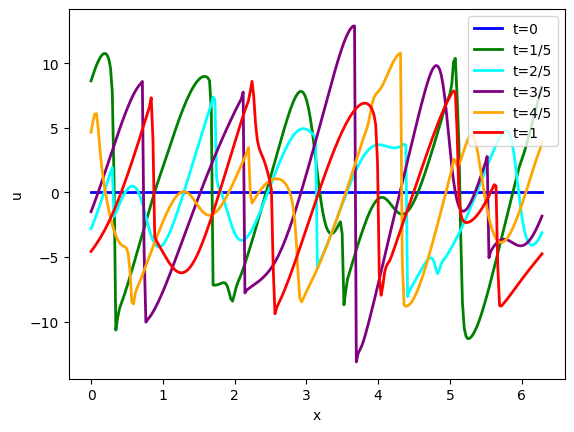

In [111]:
# Calculate indices for 1/5, 2/5, 3/5, 4/5 of the way through the simulation
indices = [0, STEPS//5, 2*STEPS//5, 3*STEPS//5, 4*STEPS//5, STEPS]

# Define colors for each plot
colors = ['blue', 'green', 'cyan', 'purple', 'orange', 'red']

# Define labels for each plot
labels = ["t=0", "t=1/5", "t=2/5", "t=3/5", "t=4/5", "t=1"]

fig = pylab.figure().gca()

# Plot velocities at each index
# Plot velocities at each index
for i, color, label in zip(indices, colors, labels):
    fig.plot(np.linspace(0, 2*np.pi, len(np.asarray(velocities[i].values))), np.asarray(velocities[i].values), lw=2, color=color, label=label)

pylab.xlabel('x'); pylab.ylabel('u'); pylab.legend()

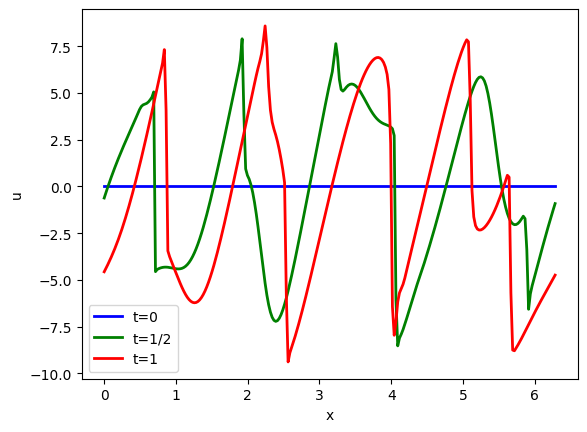

In [112]:
# Calculate indices for 0, 1/2, and 1 of the way through the simulation
indices = [0, STEPS//2, STEPS]

# Define colors for each plot
colors = ['blue', 'green', 'red']

# Define labels for each plot
labels = ["t=0", "t=1/2", "t=1"]

fig = pylab.figure().gca()

# Plot velocities at each index
for i, color, label in zip(indices, colors, labels):
    fig.plot(np.linspace(0, 2*np.pi, len(np.asarray(velocities[i].values))), np.asarray(velocities[i].values), lw=2, color=color, label=label)

pylab.xlabel('x'); pylab.ylabel('u'); pylab.legend()